# 1. Importar libs e DataSet

In [34]:
import pandas as pd
import numpy as np

#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

#Modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [33]:
csv_path = '/content/Datacluster_store_sku.csv'

df = pd.read_csv(csv_path, low_memory=False)
print("🔢 Linhas x Colunas:", df.shape)
display(df.head())

🔢 Linhas x Colunas: (149978, 64)


,oldpvp,weight (g),Margin (%),Profit (€),perc_expiring_sku,sold,selling_square_ft,newpvp,discount,d_Marca 1,d_Marca 10,d_Marca 11,d_Marca 12,d_Marca 13,d_Marca 14,d_Marca 15,d_Marca 16,d_Marca 17,d_Marca 18,d_Marca 19,d_Marca 2,d_Marca 20,d_Marca 21,d_Marca 22,d_Marca 23,d_Marca 24,d_Marca 25,d_Marca 26,d_Marca 27,d_Marca 28,d_Marca 29,d_Marca 3,d_Marca 30,d_Marca 31,d_Marca 32,d_Marca 33,d_Marca 34,d_Marca 35,d_Marca 36,d_Marca 37,d_Marca 38,d_Marca 39,d_Marca 4,d_Marca 40,d_Marca 41,d_Marca 42,d_Marca 5,d_Marca 6,d_Marca 7,d_Marca 8,d_Marca 9,type_encoded,labelling_dow_sin,labelling_dow_cos,expiring_dow_sin,expiring_dow_cos,StoreCluster_0,StoreCluster_1,StoreCluster_2,StoreCluster_3,SKUCluster_0,SKUCluster_1,SKUCluster_2,SKUCluster_3
0,4.22,260.0,0.16,0.3376,0.010050,1,4762.0,2.11,0.5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,-0.433884,-0.900969,-0.781831,0.623490,True,False,False,False,False,False,True,False
1,3.96,260.0,0.16,0.3168,0.005025,0,4762.0,1.98,0.5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,-0.433884,-0.900969,-0.974928,-0.222521,True,False,False,False,False,False,True,False
2,4.74,260.0,0.16,0.3792,0.010050,1,4762.0,2.37,0.5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,-0.433884,-0.900969,-0.781831,0.623490,True,False,False,False,False,False,True,False
3,4.20,260.0,0.16,0.3360,0.010050,1,4762.0,2.10,0.5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,-0.433884,-0.900969,-0.781831,0.623490,True,False,False,False,False,False,True,False
4,4.62,260.0,0.16,0.3696,0.010050,1,4762.0,2.31,0.5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,-0.433884,-0.900969,-0.781831,0.623490,True,False,False,False,False,False,True,False


In [35]:
# Verificaçao de missing values
null_counts = df.isna().sum()

# Condição booleana: True se alguma variavel tiver nulos
tem_nulos = null_counts.any()

print("Nulos por coluna:")
print(null_counts)
print("\nAlguma coluna tem nulos?:", tem_nulos)

Nulos por coluna:
oldpvp               0
weight (g)           0
Margin (%)           0
Profit (€)           0
perc_expiring_sku    0
sold                 0
selling_square_ft    0
newpvp               0
discount             0
d_Marca 1            0
d_Marca 10           0
d_Marca 11           0
d_Marca 12           0
d_Marca 13           0
d_Marca 14           0
d_Marca 15           0
d_Marca 16           0
d_Marca 17           0
d_Marca 18           0
d_Marca 19           0
d_Marca 2            0
d_Marca 20           0
d_Marca 21           0
d_Marca 22           0
d_Marca 23           0
d_Marca 24           0
d_Marca 25           0
d_Marca 26           0
d_Marca 27           0
d_Marca 28           0
d_Marca 29           0
d_Marca 3            0
d_Marca 30           0
d_Marca 31           0
d_Marca 32           0
d_Marca 33           0
d_Marca 34           0
d_Marca 35           0
d_Marca 36           0
d_Marca 37           0
d_Marca 38           0
d_Marca 39           0
d_Marca 4       

**Análise de correlação | Multicolinearidade**

In [32]:
#Correlação com a variável target (sold)
pd.set_option('display.max_rows', 100)

print("\n📊 Correlação com sold:")
corr_target = df.corr(numeric_only=True)['sold'].drop(['sold'], errors='ignore')
corr_target_sorted = corr_target.sort_values(key=abs, ascending=False)
print(corr_target_sorted)


📊 Correlação com sold:
d_Marca 2            0.248524
StoreCluster_0       0.154416
d_Marca 7           -0.145938
d_Marca 15          -0.135508
StoreCluster_2      -0.134452
newpvp              -0.110608
oldpvp              -0.105990
Profit (€)          -0.099051
StoreCluster_3      -0.091011
perc_expiring_sku    0.070054
d_Marca 5           -0.067594
d_Marca 33          -0.044627
StoreCluster_1       0.042234
d_Marca 21          -0.041883
SKUCluster_1         0.035596
SKUCluster_3        -0.034607
expiring_dow_sin    -0.033106
d_Marca 9           -0.031167
d_Marca 4           -0.026858
d_Marca 13          -0.024675
d_Marca 17          -0.022406
d_Marca 25          -0.020839
d_Marca 26          -0.020383
labelling_dow_cos   -0.019055
d_Marca 28          -0.016779
expiring_dow_cos    -0.016672
d_Marca 8           -0.016139
d_Marca 16          -0.014579
discount             0.012486
Margin (%)          -0.011989
weight (g)          -0.011815
d_Marca 20          -0.011441
SKUCluster_0    

/tmp/ipython-input-1411425458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')


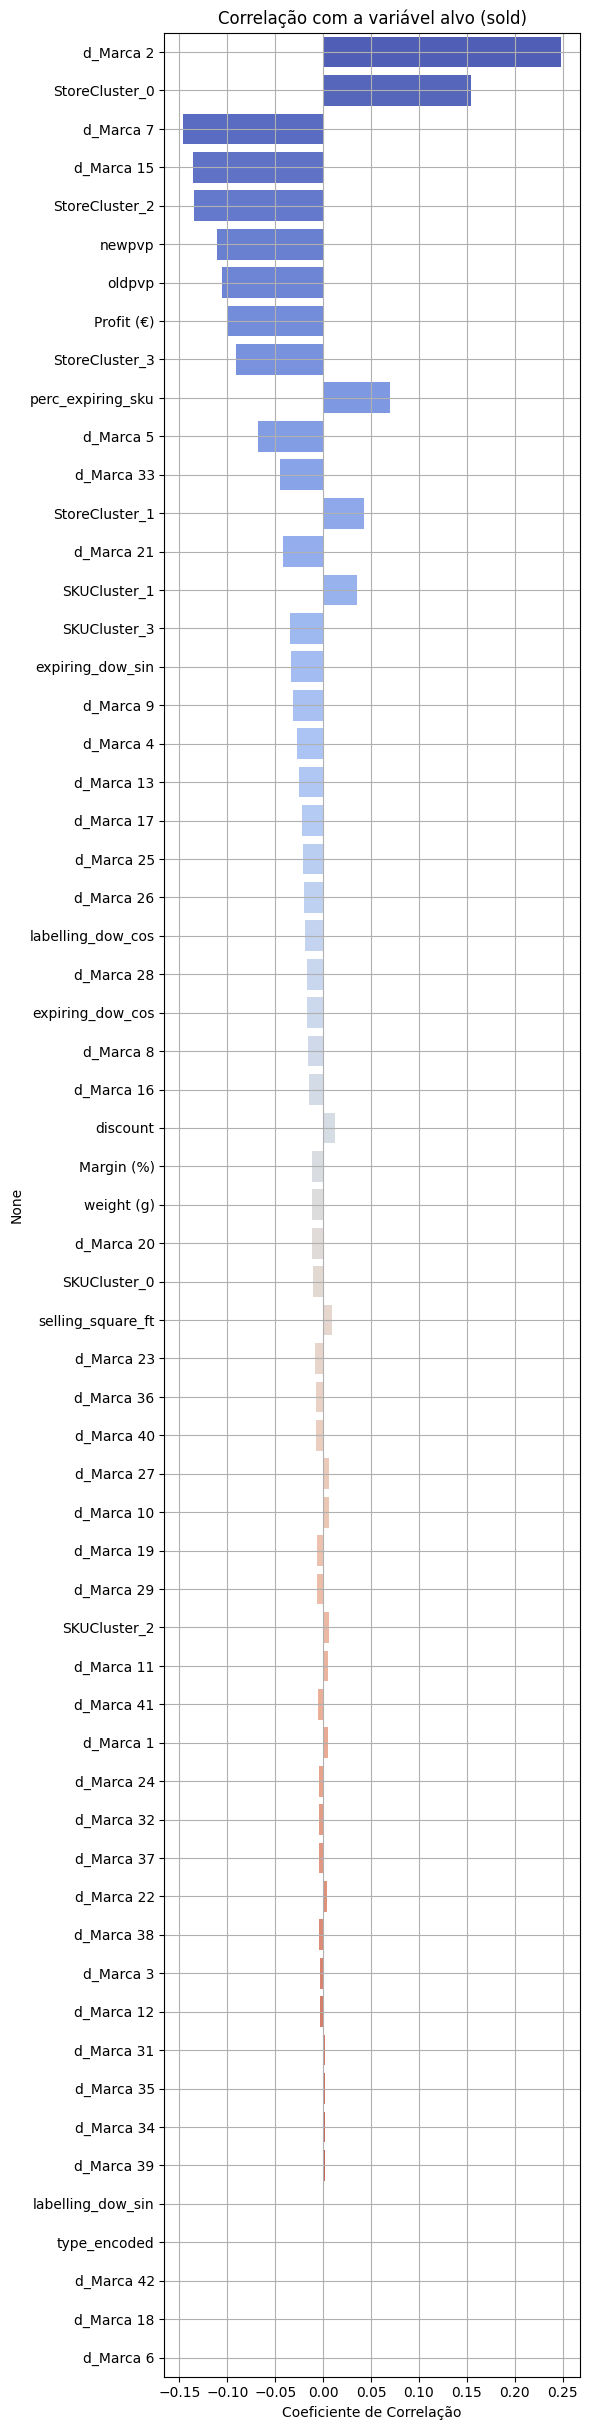

In [16]:
# Visualizar as variáveis mais correlacionadas com sold
top_corr = corr_target_sorted[abs(corr_target_sorted) > 0.0]

plt.figure(figsize=(6, len(top_corr)*0.4))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title("Correlação com a variável alvo (sold)")
plt.xlabel("Coeficiente de Correlação")
plt.grid(True)
plt.tight_layout()
plt.show()

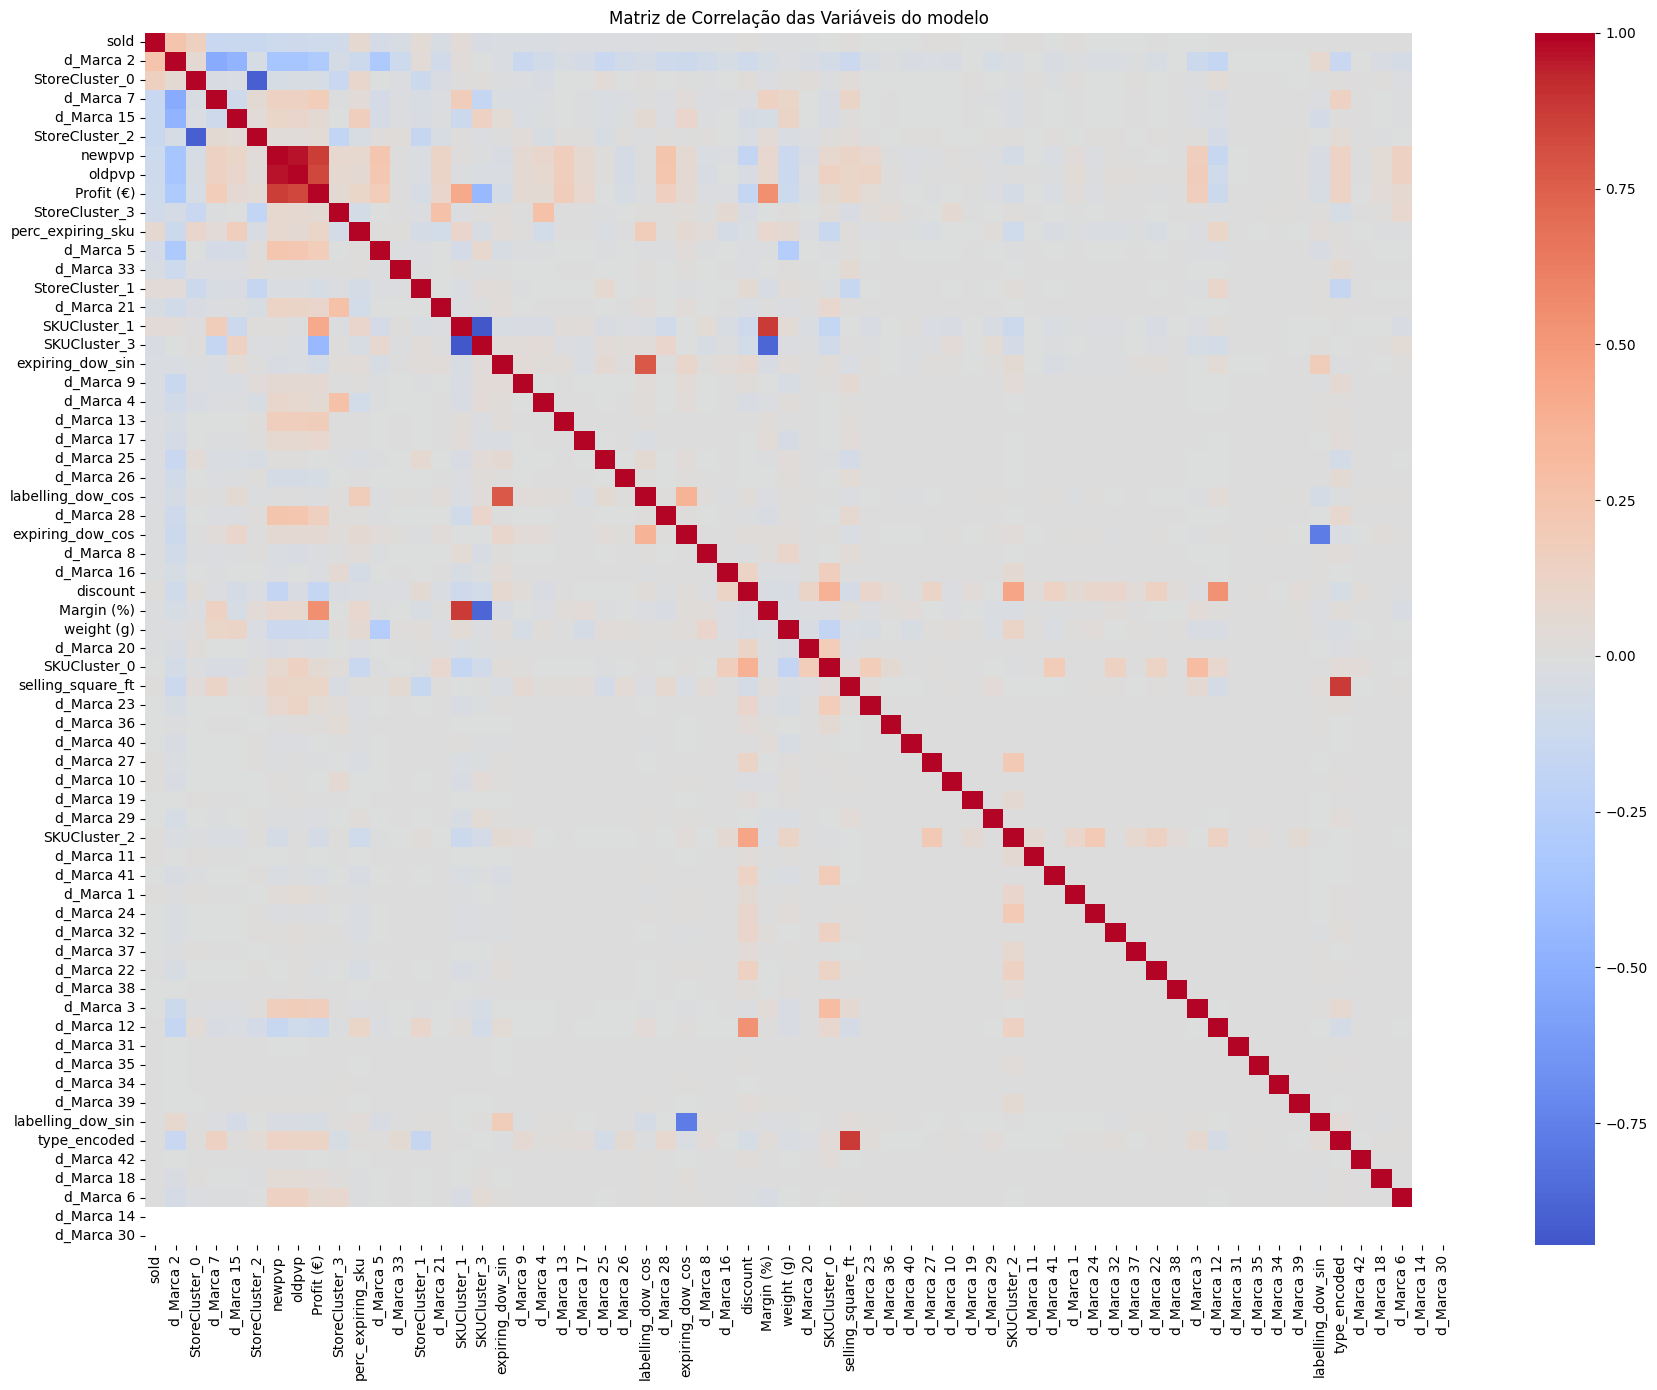

In [17]:
# lista das variáveis para avaliar correlação entre todas as variáveis, umas com as outras
cols = [
    'sold','d_Marca 2','StoreCluster_0','d_Marca 7','d_Marca 15','StoreCluster_2','newpvp','oldpvp','Profit (€)',
    'StoreCluster_3','perc_expiring_sku','d_Marca 5','d_Marca 33','StoreCluster_1','d_Marca 21','SKUCluster_1',
    'SKUCluster_3','expiring_dow_sin','d_Marca 9','d_Marca 4','d_Marca 13','d_Marca 17','d_Marca 25','d_Marca 26',
    'labelling_dow_cos','d_Marca 28','expiring_dow_cos','d_Marca 8','d_Marca 16','discount','Margin (%)','weight (g)',
    'd_Marca 20','SKUCluster_0','selling_square_ft','d_Marca 23','d_Marca 36','d_Marca 40','d_Marca 27','d_Marca 10',
    'd_Marca 19','d_Marca 29','SKUCluster_2','d_Marca 11','d_Marca 41','d_Marca 1','d_Marca 24','d_Marca 32',
    'd_Marca 37','d_Marca 22','d_Marca 38','d_Marca 3','d_Marca 12','d_Marca 31','d_Marca 35','d_Marca 34',
    'd_Marca 39','labelling_dow_sin','type_encoded','d_Marca 42','d_Marca 18','d_Marca 6','d_Marca 14','d_Marca 30'
]

# --- matriz de correlação ---
corr = df[cols].corr(numeric_only=True)

# --- heat map ---
plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de Correlação das Variáveis do modelo")
plt.tight_layout()
plt.show()

In [18]:
#Avaliar Multicolinearidade
# Interpretação
# VIF ≈ 1: sem correlação multicolinear relevante.
# VIF 5–10: pode haver multicolinearidade moderada.
# VIF > 10: forte colinearidade - avaliar remover ou transformar variáveis.



from statsmodels.stats.outliers_influence import variance_inflation_factor
V=df[[
   'StoreCluster_0', 'StoreCluster_1', 'StoreCluster_3',
   'SKUCluster_0','SKUCluster_2','SKUCluster_3',
   'oldpvp', 'perc_expiring_sku', 'discount','newpvp','selling_square_ft','weight (g)', 'Profit (€)',
   'expiring_dow_sin', 'labelling_dow_cos','labelling_dow_sin','expiring_dow_cos',
   'd_Marca 2', 'd_Marca 15', 'd_Marca 5', 'd_Marca 33',  'd_Marca 21',
   'd_Marca 8', 'd_Marca 16','d_Marca 9', 'd_Marca 4', 'd_Marca 13',
   'd_Marca 20',  'd_Marca 23','d_Marca 17', 'd_Marca 25', 'd_Marca 26',
   'd_Marca 36', 'd_Marca 40', 'd_Marca 27', 'd_Marca 28', 'd_Marca 10', 'd_Marca 19',
   'd_Marca 29',  'd_Marca 11', 'd_Marca 41', 'd_Marca 1',
   'd_Marca 24', 'd_Marca 32', 'd_Marca 37', 'd_Marca 22', 'd_Marca 38',
   'd_Marca 3', 'd_Marca 12', 'd_Marca 31', 'd_Marca 35', 'd_Marca 34',
   'd_Marca 39',   'd_Marca 42', 'd_Marca 18',
   'd_Marca 6']].copy()  # lista de features a testar

 #variáveis retiradas graduamente para ir diminuindo a multicolinearidade:
 #variáveis experimentadas: 'newpvp','selling_square_ft','Profit (€)','discount','type_encoded', 'Margin (%)'

#versão final,variáveis retiradas:'type_encoded', 'Margin (%)' - da listagem de cima, acabou-se por só se retirar estas duas para que o modelo não perdesse capacidade explicativa.
# devia-se experimentar aplicar componentes principais para agrupar variáveis que representam o mesmo e diminuir multicolineariedade


 # 'd_Marca 14','d_Marca 30',-estas marcas são sempre 0 (eliminação de outliers) - retirar
 # Tenho de retirar 1 das dummies para a soma das dummies não dar 1, e bararlhar o modelo.
   #A marca7 passa a ser a marca de referência (quando todos os outros fatores se mantém...)
   # StoreCluster_2 cluster de store de referencia
   # SKUCluster_1 cluster de sku de referencia


# como as variáveis ainda não estão standardizadas, se fizer falta converter variáveis como a type_enconded  para númerico:
V = V.apply(pd.to_numeric, errors='coerce').astype('float64')


#Cálculo da multicolinearidade
vif = pd.DataFrame()
vif["Feature"] = V.columns
vif["VIF"] = [variance_inflation_factor(V.values, i) for i in range(V.shape[1])]

vif_sorted = vif.sort_values(by="VIF", ascending=False)

print(vif_sorted)


              Feature         VIF
9              newpvp  277.915435
6              oldpvp  175.816546
12         Profit (€)   91.004879
8            discount   35.239123
11         weight (g)   10.133283
17          d_Marca 2    7.990681
5        SKUCluster_3    5.745898
7   perc_expiring_sku    4.874809
16   expiring_dow_cos    3.707743
14  labelling_dow_cos    3.591069
15  labelling_dow_sin    3.146762
13   expiring_dow_sin    3.139647
10  selling_square_ft    2.240202
18         d_Marca 15    1.919761
0      StoreCluster_0    1.822509
3        SKUCluster_0    1.669289
48         d_Marca 12    1.524422
19          d_Marca 5    1.519673
4        SKUCluster_2    1.371216
2      StoreCluster_3    1.253691
47          d_Marca 3    1.224670
21         d_Marca 21    1.155983
25          d_Marca 4    1.144218
35         d_Marca 28    1.140393
30         d_Marca 25    1.111248
24          d_Marca 9    1.106247
1      StoreCluster_1    1.089066
28         d_Marca 23    1.083752
40         d_M

# 2. Separar target e features

In [19]:
# Target
y = df["sold"]

# Features (apenas as colunas escolhidas)
features = [
   'StoreCluster_0', 'StoreCluster_1', 'StoreCluster_3',
   'SKUCluster_0','SKUCluster_2','SKUCluster_3',
   'oldpvp', 'perc_expiring_sku', 'discount','newpvp','selling_square_ft','weight (g)', 'Profit (€)',
   'expiring_dow_sin', 'labelling_dow_cos','labelling_dow_sin','expiring_dow_cos',
   'd_Marca 2', 'd_Marca 15', 'd_Marca 5', 'd_Marca 33',  'd_Marca 21',
   'd_Marca 8', 'd_Marca 16','d_Marca 9', 'd_Marca 4', 'd_Marca 13',
   'd_Marca 20',  'd_Marca 23','d_Marca 17', 'd_Marca 25', 'd_Marca 26',
   'd_Marca 36', 'd_Marca 40', 'd_Marca 27', 'd_Marca 28', 'd_Marca 10', 'd_Marca 19',
   'd_Marca 29',  'd_Marca 11', 'd_Marca 41', 'd_Marca 1',
   'd_Marca 24', 'd_Marca 32', 'd_Marca 37', 'd_Marca 22', 'd_Marca 38',
   'd_Marca 3', 'd_Marca 12', 'd_Marca 31', 'd_Marca 35', 'd_Marca 34',
   'd_Marca 39',   'd_Marca 42', 'd_Marca 18',
   'd_Marca 6'
]

# Features
X = df[features]


# 3. Train/Test split

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=24
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=24
)

print('Shapes:')
print('  Train:', X_train.shape, y_train.shape)
print('  Valid:', X_valid.shape, y_valid.shape)
print('  Test :', X_test.shape,  y_test.shape)

Shapes:
  Train: (104984, 56) (104984,)
  Valid: (22497, 56) (22497,)
  Test : (22497, 56) (22497,)


In [21]:
print("\n📊 Distribuição do target (sold) — DATASET DE TREINO:")
train_dist = y_train.value_counts(normalize=True)
print((train_dist * 100).round(2).astype(str) + '%')

print("\n📊 Distribuição do target (sold) — DATASET DE validação:")
valid_dist = y_valid.value_counts(normalize=True)
print((valid_dist * 100).round(2).astype(str) + '%')

print("\n📊 Distribuição do target (sold) — DATASET DE TESTE:")
test_dist = y_test.value_counts(normalize=True)
print((test_dist * 100).round(2).astype(str) + '%')



📊 Distribuição do target (sold) — DATASET DE TREINO:
sold
1    53.66%
0    46.34%
Name: proportion, dtype: object

📊 Distribuição do target (sold) — DATASET DE validação:
sold
1    53.66%
0    46.34%
Name: proportion, dtype: object

📊 Distribuição do target (sold) — DATASET DE TESTE:
sold
1    53.66%
0    46.34%
Name: proportion, dtype: object


# 4. Standardizar/Padronizar os dados

In [22]:
continuous_cols = ['oldpvp','weight (g)','newpvp','selling_square_ft','Profit (€)']



#Criar cópias para não perder as colunas originais
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()
X_valid_scaled  = X_valid.copy()

#Ajustar o scaler **apenas no treino** e transformar as mesmas colunas
scaler = StandardScaler()
X_train_scaled[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test_scaled[continuous_cols]  = scaler.transform(X_test[continuous_cols])
X_valid_scaled[continuous_cols]  = scaler.transform(X_valid[continuous_cols])



pd.set_option('display.max_columns', None)   # mostra todas as colunas
pd.set_option('display.width', None)         # evita quebras de linha
display(X_train_scaled.head())

display(X_test_scaled.head())




,StoreCluster_0,StoreCluster_1,StoreCluster_3,SKUCluster_0,SKUCluster_2,SKUCluster_3,oldpvp,perc_expiring_sku,discount,newpvp,selling_square_ft,weight (g),Profit (€),expiring_dow_sin,labelling_dow_cos,labelling_dow_sin,expiring_dow_cos,d_Marca 2,d_Marca 15,d_Marca 5,d_Marca 33,d_Marca 21,d_Marca 8,d_Marca 16,d_Marca 9,d_Marca 4,d_Marca 13,d_Marca 20,d_Marca 23,d_Marca 17,d_Marca 25,d_Marca 26,d_Marca 36,d_Marca 40,d_Marca 27,d_Marca 28,d_Marca 10,d_Marca 19,d_Marca 29,d_Marca 11,d_Marca 41,d_Marca 1,d_Marca 24,d_Marca 32,d_Marca 37,d_Marca 22,d_Marca 38,d_Marca 3,d_Marca 12,d_Marca 31,d_Marca 35,d_Marca 34,d_Marca 39,d_Marca 42,d_Marca 18,d_Marca 6
146890,True,False,False,False,False,False,-0.688857,0.400000,0.30,-0.680748,-0.762493,-0.281609,-0.111143,-0.974928,-0.900969,0.433884,-0.222521,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4839,True,False,False,False,False,False,-0.688857,0.200000,0.30,-0.680748,-0.996276,0.186575,-0.658736,-0.433884,-0.900969,0.433884,-0.900969,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
137601,True,False,False,False,False,False,0.209953,0.666667,0.30,0.215576,0.066306,-1.928923,0.812508,0.974928,1.000000,0.000000,-0.222521,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96159,False,False,False,False,False,True,-1.767428,0.000000,0.31,-1.756337,-0.595374,0.758800,-1.760520,0.000000,1.000000,0.000000,1.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
108263,False,False,False,False,False,False,0.030191,0.666667,0.30,0.036311,-0.774430,-0.732453,0.334848,0.433884,0.623490,0.781831,-0.900969,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


,StoreCluster_0,StoreCluster_1,StoreCluster_3,SKUCluster_0,SKUCluster_2,SKUCluster_3,oldpvp,perc_expiring_sku,discount,newpvp,selling_square_ft,weight (g),Profit (€),expiring_dow_sin,labelling_dow_cos,labelling_dow_sin,expiring_dow_cos,d_Marca 2,d_Marca 15,d_Marca 5,d_Marca 33,d_Marca 21,d_Marca 8,d_Marca 16,d_Marca 9,d_Marca 4,d_Marca 13,d_Marca 20,d_Marca 23,d_Marca 17,d_Marca 25,d_Marca 26,d_Marca 36,d_Marca 40,d_Marca 27,d_Marca 28,d_Marca 10,d_Marca 19,d_Marca 29,d_Marca 11,d_Marca 41,d_Marca 1,d_Marca 24,d_Marca 32,d_Marca 37,d_Marca 22,d_Marca 38,d_Marca 3,d_Marca 12,d_Marca 31,d_Marca 35,d_Marca 34,d_Marca 39,d_Marca 42,d_Marca 18,d_Marca 6
112121,False,False,False,False,False,False,1.288524,0.666667,0.3,1.291165,0.230120,0.065194,1.287528,-0.974928,-0.900969,0.433884,-0.222521,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
47230,False,False,False,False,False,False,-0.149571,0.333333,0.3,-0.142953,-1.014824,-0.194908,0.031363,-0.974928,-0.900969,-0.433884,-0.222521,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
108118,True,False,False,False,False,False,0.030191,0.666667,0.3,0.036311,-0.819240,-0.732453,0.334848,0.433884,0.623490,0.781831,-0.900969,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
101256,False,True,False,False,False,True,0.749238,0.250000,0.3,0.753371,-1.027679,1.296345,0.266234,0.433884,-0.222521,0.974928,-0.900969,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2423,False,False,False,False,False,False,-0.688857,0.200000,0.3,-0.680748,-0.885536,0.186575,-0.658736,0.781831,1.000000,0.000000,0.623490,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# 5. Regressão logistica - Treinar moelo

In [23]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Treinar o modelo

#modelo1
#logreg = LogisticRegression(solver='liblinear', random_state=42)

#modelo2
"""logreg = LogisticRegression(
    solver="lbfgs",
    penalty="l2",#l1
    C=1,#0.01;#0.1
    class_weight=None, #"balanced" - se os dados estiverem desbalanceados
    max_iter=5000,#1000;#2000
    random_state=42
 )"""

#modelo3
logreg = LogisticRegression(
    solver="saga",
    penalty="l2",
    C=1,#0.1
    class_weight=None, #"balanced" - se os dados estiverem desbalanceados
    max_iter=5000,#1000
    random_state=42
 )
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=5000, random_state=42, solver='saga')

# 6. AVALIAÇÃO DO MODELO

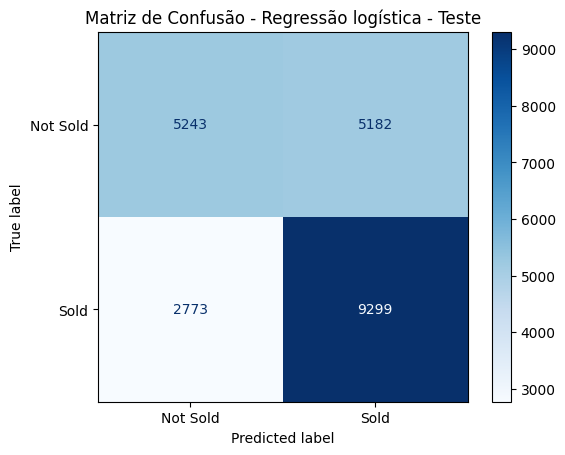

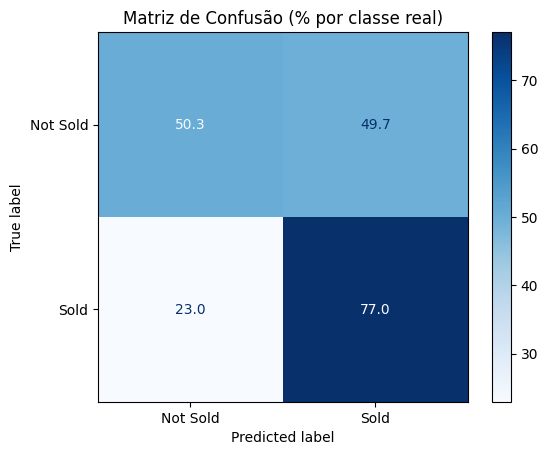

🎯 Avaliação do Modelo (Base de Teste)
- Acurácia:  0.646
- Precisão:  0.642
- Recall:    0.770
- F1 Score:  0.700
- ROC AUC:   0.690


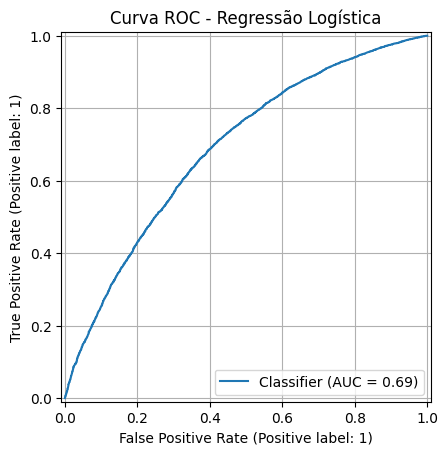

In [24]:
# ===========================================
# 📊 AVALIAÇÃO DO MODELO: teste
# ===========================================

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    RocCurveDisplay
)

#Previsões na base de teste, com corte pre-definido a 0,5
#y_test_pred = logreg.predict(X_test_scaled)
#y_test_probs = logreg.predict_proba(X_test_scaled)[:, 1]  # Probabilidades da venda (sold=1)


#simular vários thresholds:0,7;0,6;0,55;0.53
y_test_probs = logreg.predict_proba(X_test_scaled)[:,1]
y_test_pred = (y_test_probs >= 0.5).astype(int)

#Matriz de Confusão
#from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels=[0, 1],
    display_labels=['Not Sold', 'Sold'],
    cmap='Blues', values_format='d'
)
plt.title("Matriz de Confusão - Regressão logística - Teste")
plt.show()


# Matriz de confusão em %
#valores absolutos
mc = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

# Normalizar cada linha (% por classe real)
mc_perc = mc.astype(float) / mc.sum(axis=1)[:, np.newaxis] * 100

# APresentar já em %
disp = ConfusionMatrixDisplay(confusion_matrix=mc_perc,
                              display_labels=['Not Sold', 'Sold'])
disp.plot(cmap='Blues', values_format='.1f')  # .1f = uma casa decimal
plt.title("Matriz de Confusão (% por classe real)")
plt.show()


#Cálculo das métricas
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_probs)

print("🎯 Avaliação do Modelo (Base de Teste)")
print(f"- Acurácia:  {acc:.3f}")
print(f"- Precisão:  {prec:.3f}")
print(f"- Recall:    {rec:.3f}")
print(f"- F1 Score:  {f1:.3f}")
print(f"- ROC AUC:   {auc:.3f}")

#Curva ROC
##RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test)
RocCurveDisplay.from_predictions(y_test, y_test_probs)
plt.title("Curva ROC - Regressão Logística")
plt.grid(True)
plt.show()


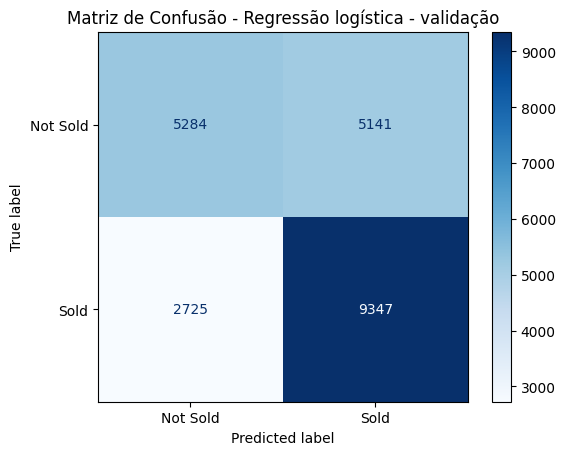

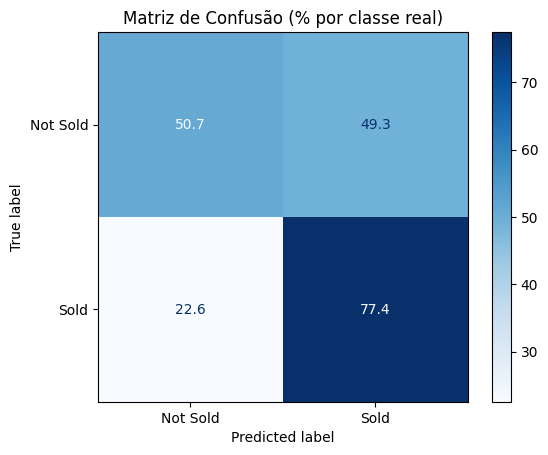

🎯 Avaliação do Modelo (Base de validação)
- Acurácia:  0.650
- Precisão:  0.645
- Recall:    0.774
- F1 Score:  0.704
- ROC AUC:   0.694


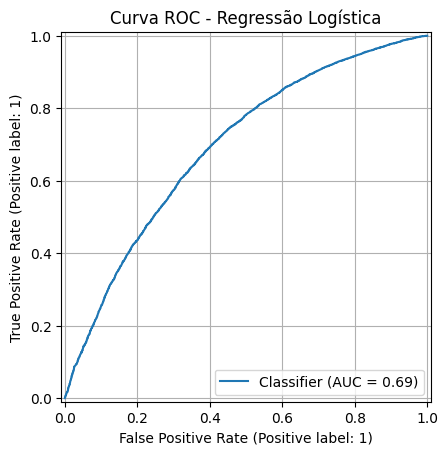

In [25]:
# ===========================================
# 📊 AVALIAÇÃO DO MODELO: VALIDACAO
# ===========================================

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    RocCurveDisplay
)

#Previsões na base de teste
y_valid_pred = logreg.predict(X_valid_scaled)
y_valid_probs = logreg.predict_proba(X_valid_scaled)[:, 1]  # Probabilidades da venda (sold=1)

#Matriz de Confusão em valores absolutos
#from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay.from_predictions(
    y_valid, y_valid_pred,
    labels=[0, 1],
    display_labels=['Not Sold', 'Sold'],
    cmap='Blues', values_format='d'
)
plt.title("Matriz de Confusão - Regressão logística - validação")
plt.show()


# Matriz de confusão em %
#valores absolutos
cm = confusion_matrix(y_valid, y_valid_pred, labels=[0, 1])

# Normalizar cada linha (% por classe real)
cm_perc = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis] * 100

# APresentar já em %
disp = ConfusionMatrixDisplay(confusion_matrix=cm_perc,
                              display_labels=['Not Sold', 'Sold'])
disp.plot(cmap='Blues', values_format='.1f')  # .1f = uma casa decimal
plt.title("Matriz de Confusão (% por classe real)")
plt.show()



#Cálculo das métricas
acc = accuracy_score(y_valid, y_valid_pred)
prec = precision_score(y_valid, y_valid_pred)
rec = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)
auc = roc_auc_score(y_valid, y_valid_probs)

print("🎯 Avaliação do Modelo (Base de validação)")
print(f"- Acurácia:  {acc:.3f}")
print(f"- Precisão:  {prec:.3f}")
print(f"- Recall:    {rec:.3f}")
print(f"- F1 Score:  {f1:.3f}")
print(f"- ROC AUC:   {auc:.3f}")

#Curva ROC
##RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test)
RocCurveDisplay.from_predictions(y_valid, y_valid_probs)
plt.title("Curva ROC - Regressão Logística")
plt.grid(True)
plt.show()


In [26]:
# comparação treino vs teste vs validação para a Regressão Logística
from sklearn.metrics import accuracy_score

# Previsões
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)
y_valid_pred = logreg.predict(X_valid_scaled)

# Métricas
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
acc_valid = accuracy_score(y_valid, y_valid_pred)

print(f"Acurácia no Treino: {acc_train:.3f}")
print(f"Acurácia no Teste:  {acc_test:.3f}")
print(f"Acurácia na Validação:  {acc_valid:.3f}")

Acurácia no Treino: 0.648
Acurácia no Teste:  0.646
Acurácia na Validação:  0.650


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from scipy.stats import norm



pd.set_option('display.max_rows', None)    # mostra todas as linhas
pd.set_option('display.max_columns', None) # mostra todas as colunas (se necessário)
pd.set_option('display.width', None)       # evita quebra de linha
pd.set_option('display.max_colwidth', None)# não corta o texto de colunas longas


# --------------------------------------------------
# 2) Coeficientes e Odds Ratios
# --------------------------------------------------
coef = logreg.coef_[0]
feature_names = X.columns

odds_ratio = np.exp(coef)
importance_coef = pd.DataFrame({
    "feature": feature_names,
    "coef": coef,
    "odds_ratio": odds_ratio,
    "abs_coef": np.abs(coef)
}).sort_values("abs_coef", ascending=False)

print("\n=== Coeficientes padronizados e Odds Ratio ===")
display(importance_coef)



=== Coeficientes padronizados e Odds Ratio ===


,feature,coef,odds_ratio,abs_coef
36,d_Marca 10,1.984340,7.274244,1.984340
55,d_Marca 6,1.694891,5.446054,1.694891
34,d_Marca 27,1.410203,4.096789,1.410203
25,d_Marca 4,1.281032,3.600355,1.281032
52,d_Marca 39,1.279934,3.596401,1.279934
17,d_Marca 2,1.275037,3.578834,1.275037
47,d_Marca 3,1.210304,3.354505,1.210304
7,perc_expiring_sku,1.106140,3.022667,1.106140
54,d_Marca 18,1.076255,2.933672,1.076255
41,d_Marca 1,1.020098,2.773466,1.020098


In [28]:
# importance features


perm = permutation_importance(
    logreg,               # usar o modelo já treinado
    X_test, y_test,
    scoring="roc_auc", n_repeats=30, random_state=42
)

# Usa os nomes das colunas de X_test
feat_names = X_test.columns

perm_df = pd.DataFrame({
    "feature": feat_names,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)


print("\n=== Importance Features ===")
display(perm_df)



=== Importance Features ===


,feature,importance_mean,importance_std
10,selling_square_ft,2.188256e-03,3.565305e-03
17,d_Marca 2,4.627839e-04,1.859098e-05
0,StoreCluster_0,9.812097e-05,9.480825e-06
7,perc_expiring_sku,6.602948e-05,9.766973e-06
5,SKUCluster_3,3.776012e-05,9.035699e-06
11,weight (g),3.414882e-05,3.660677e-05
2,StoreCluster_3,3.243118e-05,4.522632e-06
1,StoreCluster_1,1.548980e-05,4.282118e-06
12,Profit (€),1.129368e-05,1.834506e-06
13,expiring_dow_sin,5.707164e-06,3.010699e-06
